In [5]:
#### -------------- Pre processing and Clustering of Climate Data ---------------------

# Libraries required
import os
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.decomposition import PCA

print("done")

done


In [7]:
####   Loading Data Files and analyzing dataframe

wd = str(os.getcwd())
climate_data = pd.read_csv(wd + "/ClimateDataBasel.csv",header=None)
type(climate_data)

# Assigning column names to data
climate_data.columns = ['temp_min','temp_max','temp_mean','relativehumidity_min','relativehumidity_max',
                        'relativehumidity_mean','sealevelpress_min','sealevelpress_max','sealevelpress_mean',
                        'precipitation_mm','snowfall_cm','sunshine_min','windgust_min','windgust_max','windgust_mean',
                        'windspeed_min','windspeed_max','windspeed_mean']
climate_data.shape

temp_min   temp_max  temp_mean  relativehumidity_min  \
0      8.100529  17.570530  13.445111                    61   
1     11.110529  18.490528  14.988861                    59   
2     10.320529  18.170528  14.267612                    71   
3     10.450529  24.980530  17.309278                    54   
4     12.350529  25.610529  19.881780                    47   
...         ...        ...        ...                   ...   
1758   6.160529  10.110529   7.720112                    82   
1759   1.830529   7.000528   4.553861                    53   
1760  -0.529471   4.230528   1.380112                    40   
1761   0.440529   7.760529   3.317195                    41   
1762   2.960529   8.560529   5.306362                    50   

      relativehumidity_max  relativehumidity_mean  sealevelpress_min  \
0                       96              77.875000             1013.1   
1                       94              76.458336             1013.9   
2                       96              83.583336             1015.3   
3                       92              77.625000             1015.9   
4                       88              66.583336             1015.7   
...                    ...                    ...                ...   
1758                    94              87.500000             1025.6   
1759                    95              75.625000             1034.7   
1760                    83              63.291668             1036.7   
1761                    69              53.416668             1032.2   
1762                    84              68.541664             1031.7   

      sealevelpress_max  sealevelpress_mean  precipitation_mm  snowfall_cm  \
0                1018.4          1015.75830               0.2          0.0   
1                1016.6          1014.99170               1.9          0.0   
2                1017.5          1016.38745               0.1          0.0   
3                1018.7          1017.26250               0.0          0.0   
4                1020.7          1018.18353               0.0          0.0   
...                 ...                 ...               ...          ...   
1758             1034.7          1028.06240               5.0          0.0   
1759             1040.3          1038.10850               0.0          0.0   
1760             1039.8          1038.11240               0.0          0.0   
1761             1037.5          1034.68320               0.0          0.0   
1762             1033.6          1032.70420               0.0          0.0   

      sunshine_min  windgust_min  windgust_max  windgust_mean  windspeed_min  \
0        350.56274      3.240000     23.400000      12.210002       1.787066   
1        287.23404      6.479999     25.199999      14.880001       4.161301   
2        126.26506      3.240000     24.119999      12.764999       2.028842   
3        881.24710      2.160000     20.160000       9.480000       0.799200   
4        951.56665      0.720000     15.840000       5.565001       0.376746   
...            ...           ...           ...            ...            ...   
1758       0.00000      9.720000     32.760002      18.974997       3.786256   
1759     502.84442      3.600000     23.039999      16.994999       1.332000   
1760     489.58572      5.760000     24.840000      17.070000       1.191377   
1761     513.05000      2.160000     25.560000      16.140000       0.266400   
1762     442.23660      0.720000     25.199999       8.204999       0.266400   

      windspeed_max  windspeed_mean  
0         10.403253        6.639939  
1         16.285300        8.616541  
2         11.289829        6.372418  
3         11.483046        4.690738  
4          6.443357        3.311275  
...             ...             ...  
1758      17.082869        9.509177  
1759      14.241816        8.690425  
1760      10.290077        5.954996  
1761       7.406686        3.565386  
1762       6.287266        4.138569  

[1763 rows x 18 columns]

In [568]:
#### ------ 1. Pre - Processing of Data (Feature Selection)

### 1.1. General Data Analysis

## Checking Null Values
print("Null values = ",climate_data.isnull().any().any(),"\n")

## Checking Percentage of Zeroes in Data Variables
print("percentage zero= \n",(climate_data == 0).sum()/len(climate_data)*100,"\n")

## Checking Variance in Data Variables
print("Variance in data = " ,climate_data.var(),"\n")

## Checking Percentage of Unique Values in Data Variables
print("percentage unique snow = ",len(set(climate_data['snowfall_cm']))/len(climate_data['snowfall_cm'])*100,"\n")

# Note:
#[Near-zero variance means that the fraction of unique values over the sample size is low (say 10%) 
#[...] [and the] ratio of the frequency of the most prevalent value to the frequency of the 
#second most prevalent value is large say around twenty 

#print("unique percentages: \n",climate_data.value_counts(subset=['precipitation_mm'],normalize=True)*100)

print("percentage unique precp = ",len(set(climate_data['precipitation_mm']))/len(climate_data['snowfall_cm'])*100,"\n")
print("percentage unique sun = ",len(set(climate_data['sunshine_min']))/len(climate_data['snowfall_cm'])*100,"\n")

# Central Tendency Statistics
print(" Central Tendency Statistics: ","\n", climate_data.describe(include='all'),"\n")


Null values =  False 

percentage zero= 
 temp_min                  0.000000
temp_max                  0.000000
temp_mean                 0.000000
relativehumidity_min      0.000000
relativehumidity_max      0.000000
relativehumidity_mean     0.000000
sealevelpress_min         0.000000
sealevelpress_max         0.000000
sealevelpress_mean        0.000000
precipitation_mm         53.575482
snowfall_cm              93.700341
sunshine_min             10.669694
windgust_min              0.170261
windgust_max              0.000000
windgust_mean             0.000000
windspeed_min             3.632236
windspeed_max             0.000000
windspeed_mean            0.000000
dtype: float64 

Variance in data =  temp_min                    60.932090
temp_max                    93.131944
temp_mean                   77.282264
relativehumidity_min       167.766149
relativehumidity_max        62.274276
relativehumidity_mean      100.274086
sealevelpress_min           78.334561
sealevelpress_max        

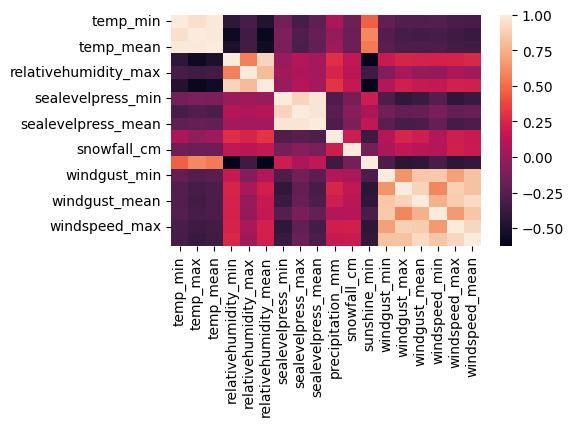

In [608]:
### 1.2. Correlation between variables

# Standardization of Data for HeatMap
def standardize(aa):
    aa2 = aa
    cols = aa.columns
    size = len(cols)
    means = aa.mean(axis=0)
    stds = aa.std(axis=0)
    for c in range(0,len(cols)):
        aa2[cols[c]]= (aa[cols[c]]-means[c])/stds[c]
    return aa2
        
stand_data = standardize(climate_data)

# Heat map of data
corr = stand_data.corr(method='pearson')
heatmap = sns.heatmap(corr, annot=False)
#corr
#fig = heatmap.get_figure()
#fig.savefig("Heatmap Climate Data.png", dpi=50) 

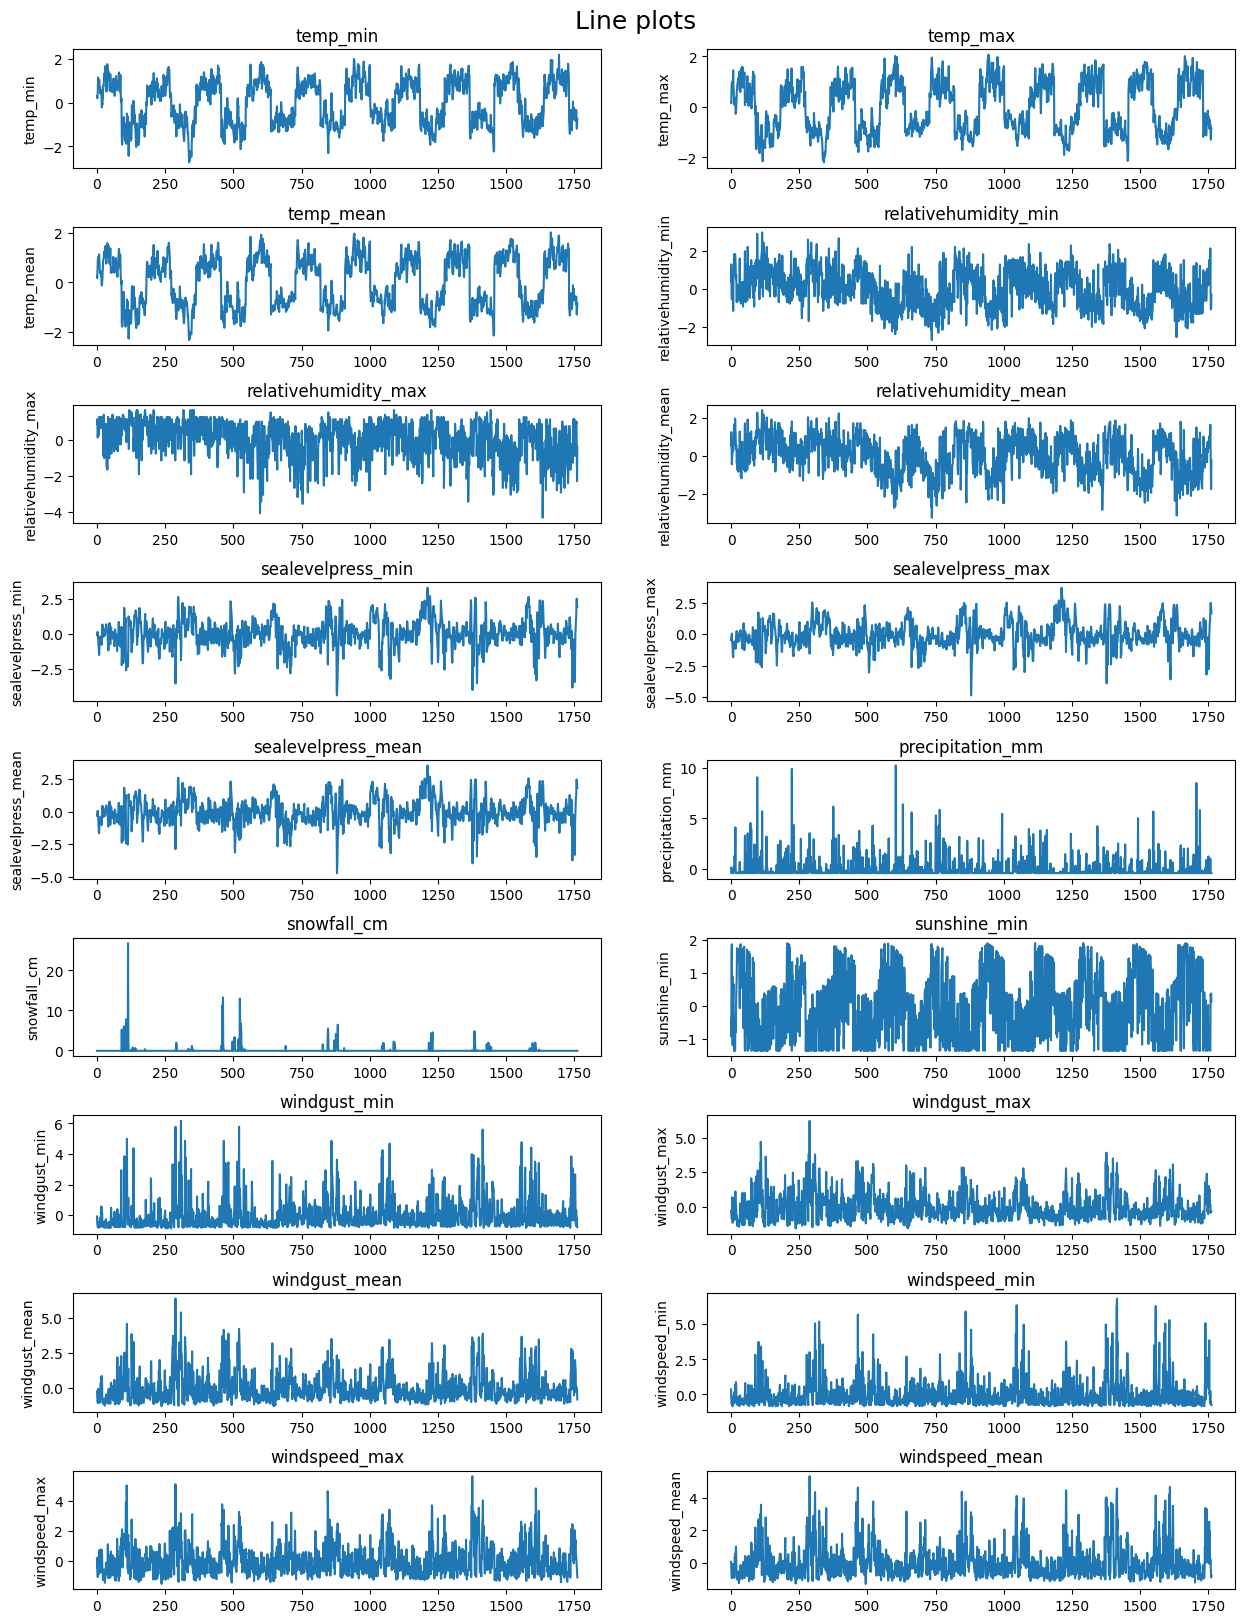

In [570]:
### Pre - Processing of Data and Exploration of Data Features

### 1.3 Time Series Plots
# Timeseries plots
def timeseriesplots(aa):
    cols = aa.columns
    plt.figure(figsize = (15,20))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("Line plots", fontsize=18,y=0.90)
    #plt.subplots(1,2)
    for i in range(0,len(cols)):
        ax = plt.subplot(round(len(cols)/2),2,i+1)
        #plt.subplot(1)
        aa[cols[i]].plot(ax=ax)
        ax.set_title(cols[i])
        ax.set_ylabel(cols[i])

timeseriesplots(climate_data)

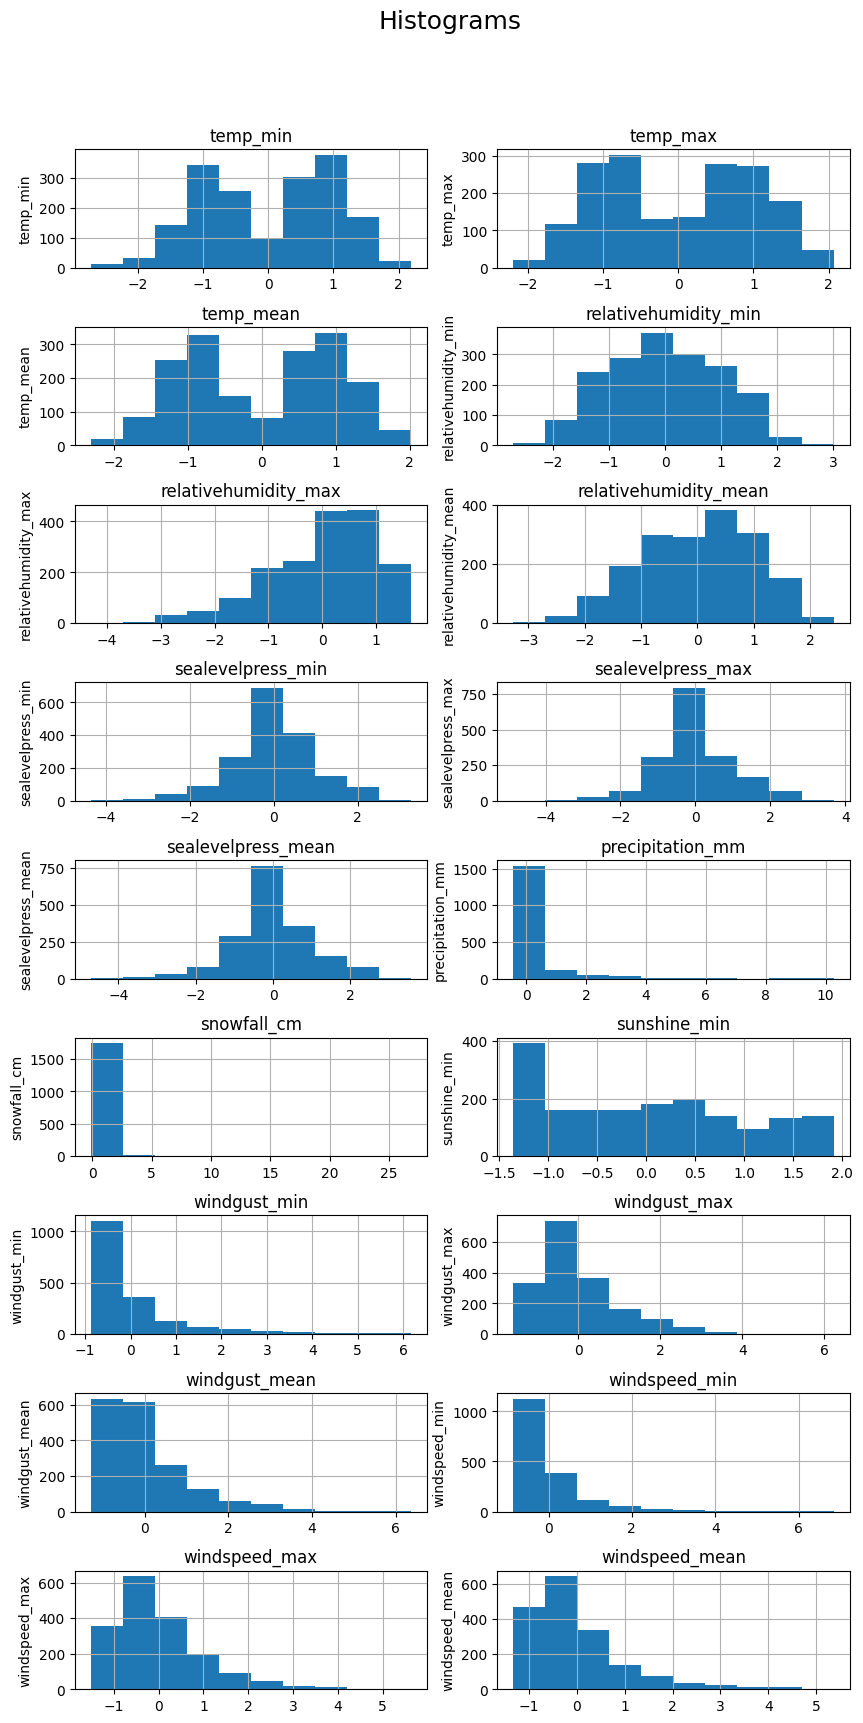

In [571]:

### 1.4 Histograms of Data

def histogramplots(aa):
    cols = aa.columns
    plt.figure(figsize = (10,20))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("Histograms", fontsize=18, y=0.95)
    #plt.subplots(1,2)
    for i in range(0,len(cols)):
        ax = plt.subplot(round(len(cols)/2),2,i+1)
        #plt.subplot(1)
        aa[cols[i]].hist(ax=ax)
        ax.set_title(cols[i])
        ax.set_ylabel(cols[i])

histogramplots(climate_data)

In [572]:
# 1.5 Scatterplots of Data

def scatterplots(aa):
    cols = aa.columns
    plt.figure(figsize = (10,20))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("Scatter plots", fontsize=18, y=0.95)
    
    #plt.subplots(1,2)
    for i in range(0,len(cols)):
        x =np.arange(1, len(aa[cols[i]])+1)
        ax = plt.subplot(round(len(cols)/2),2,i+1)
        #plt.subplot(1)
        ax.scatter(x,aa[cols[i]],alpha=0.5,s=10)
        ax.set_title(cols[i])
        ax.set_ylabel(cols[i])
        #ax.set_ylabel("count")

# Hidden as no new insights were gained        
#scatterplots(climate_data)

In [573]:

### 1.7 Feature Selection (Excluding redundant and anomolous data)
# Means selected to form new dataframe
CD2_stand = pd.DataFrame(stand_data, columns=['temp_mean', 'relativehumidity_mean','sealevelpress_mean',
                                                   'windspeed_mean','precipitation_mm','sunshine_min'])
CD2_stand = CD2_stand.rename(columns={'temp_mean':'temperature', 'relativehumidity_mean':'humidity','sealevelpress_mean':'seapressure',
                            'windspeed_mean':'windspeed','precipitation_mm':'precipitation','sunshine_min':'sunshine'})
CD2_stand.shape
CD2_stand

#climatedata2.to_csv("/Users/risham/Downloads/SCC 403 Data Mining/Course work due 15 Dec/climatedata2.csv")
#climate_data.to_csv("/Users/risham/Downloads/SCC 403 Data Mining/Course work due 15 Dec/climate_data.csv")


temperature  humidity  seapressure  windspeed  precipitation  sunshine
0        0.258437  0.541429    -0.312115   0.037775       0.113327 -0.379863
1        0.176393  1.252955    -0.143638  -0.393214      -0.401317 -0.925998
2        0.522389  0.657936    -0.038014  -0.716185      -0.429908  1.635501
3        0.815017 -0.444720     0.073161  -0.981114      -0.429908  1.874081
4        1.013135 -0.153453    -0.360409  -0.422872      -0.115404  0.141798
...           ...       ...          ...        ...            ...       ...
1757    -0.568400  1.644085     1.265608   0.209208       0.999658 -1.354390
1758    -0.928568  0.458210     2.478241   0.051965      -0.429908  0.351658
1759    -1.289590 -0.773437     2.478712  -0.473381      -0.429908  0.306674
1760    -1.069242 -1.759586     2.064784  -0.932311      -0.429908  0.386284
1761    -0.842970 -0.249155     1.825905  -0.822230      -0.429908  0.146029

[1762 rows x 6 columns]

Outliers detected by the boxplot method
outliers 0 temperature
outliers 2 humidity
outliers 109 seapressure
outliers 108 windspeed
outliers 278 precipitation
outliers 0 sunshine


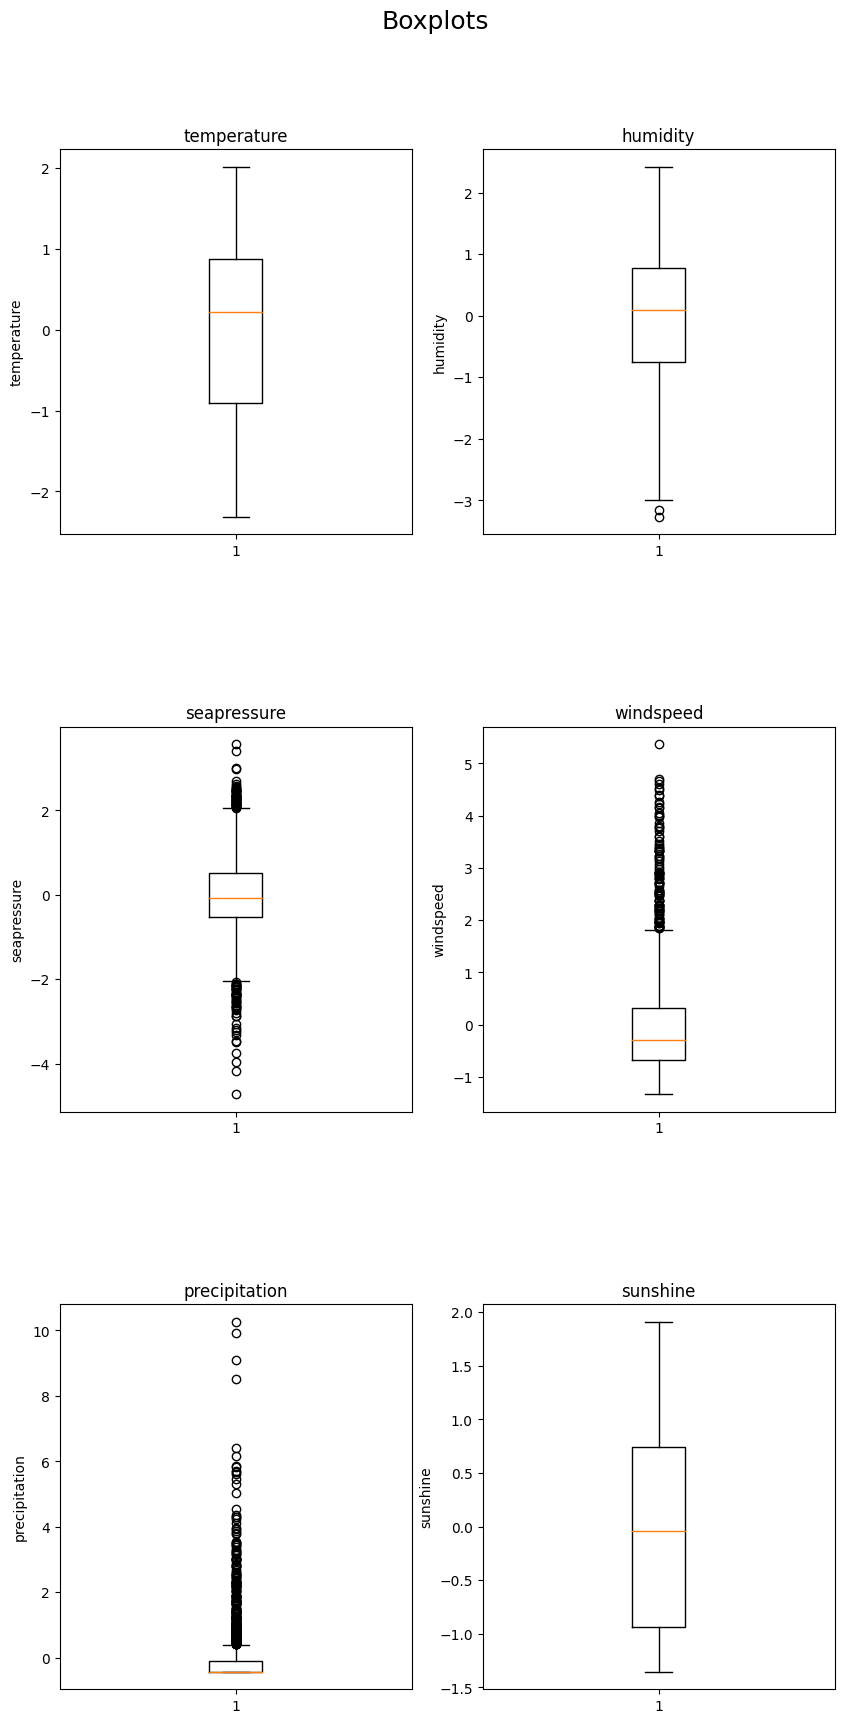

In [574]:
#### ------------ 2. Data Cleaning ----------------

## 2.1 Outlier Detection through Boxplots

###  Detection through Boxplot method 
def countoutliers1(aa):
    cols = aa.columns
    outlier_df = pd.DataFrame()
    for c in range(0,len(cols)):
        Q1 = aa[cols[c]].quantile(0.25)
        Q3 = aa[cols[c]].quantile(0.75)
        IQR = Q3 - Q1
        data = aa[cols[c]]
        # identify outliers
        threshold = 1.5
        outliers = (data < (Q1 - threshold * IQR)) | (data > (Q3 + threshold * IQR))
        outlier_df[cols[c]] = data[outliers]
        #print(c,IQR,outliers)
        #print("data=",data)
        print("outliers",len(data[outliers]),cols[c])
    return outlier_df

# Boxplots of data
def boxplots(aa):
    cols = aa.columns
    plt.figure(figsize = (10,20))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("Boxplots", fontsize=18, y=0.95)
    #plt.subplots(1,2)
    for i in range(0,len(cols)):
        ax = plt.subplot(round(len(cols)/2),2,i+1)
        #plt.subplot(1)
        ax.boxplot(aa[cols[i]])
        ax.set_title(cols[i])
        ax.set_ylabel(cols[i])

print("Outliers detected by the boxplot method")
AA = countoutliers1(CD2_stand)
boxplots(CD2_stand)


In [575]:
## 2.2 Outlier Detection through Z score analysis

# Z score method
def countoutliers2(aa):
    aa2 = aa
    cols = aa.columns
    outlier_df = pd.DataFrame()
    thresh = 3
    for c in range(0,len(cols)):
        data = abs(aa[cols[c]])
        # identify outliers
        threshold = 1.5
        outliers = (data > thresh)
        (aa2[cols[c]])[outliers] = 0
        #print(c,IQR,outliers)
        #print("data=",data)
        print("outliers",len(data[outliers]),cols[c])
    return outlier_df

print("Outliers detected by the Z-score method (Threshhold 3)")
AA = countoutliers2(CD2_stand)


Outliers detected by the Z-score method (Threshhold 3)
outliers 0 temperature
outliers 2 humidity
outliers 13 seapressure
outliers 39 windspeed
outliers 44 precipitation
outliers 0 sunshine


In [576]:
CD2_stand.describe(include='all')
#CD2_stand

temperature     humidity  seapressure    windspeed  precipitation  \
count  1.762000e+03  1762.000000  1762.000000  1762.000000    1762.000000   
mean  -4.839111e-17     0.003641     0.018463    -0.084302      -0.114745   
std    1.000000e+00     0.994132     0.950676     0.815409       0.612908   
min   -2.314308e+00    -2.987072    -2.876655    -1.329922      -0.429908   
25%   -9.133302e-01    -0.746391    -0.508263    -0.681505      -0.429908   
50%    2.180309e-01     0.096205    -0.067680    -0.283900      -0.429908   
75%    8.777823e-01     0.770282     0.504286     0.247780      -0.086812   
max    2.014345e+00     2.418026     2.996761     2.971741       2.972460   

           sunshine  
count  1.762000e+03  
mean  -4.839111e-17  
std    1.000000e+00  
min   -1.354390e+00  
25%   -9.346187e-01  
50%   -3.870713e-02  
75%    7.464404e-01  
max    1.910440e+00

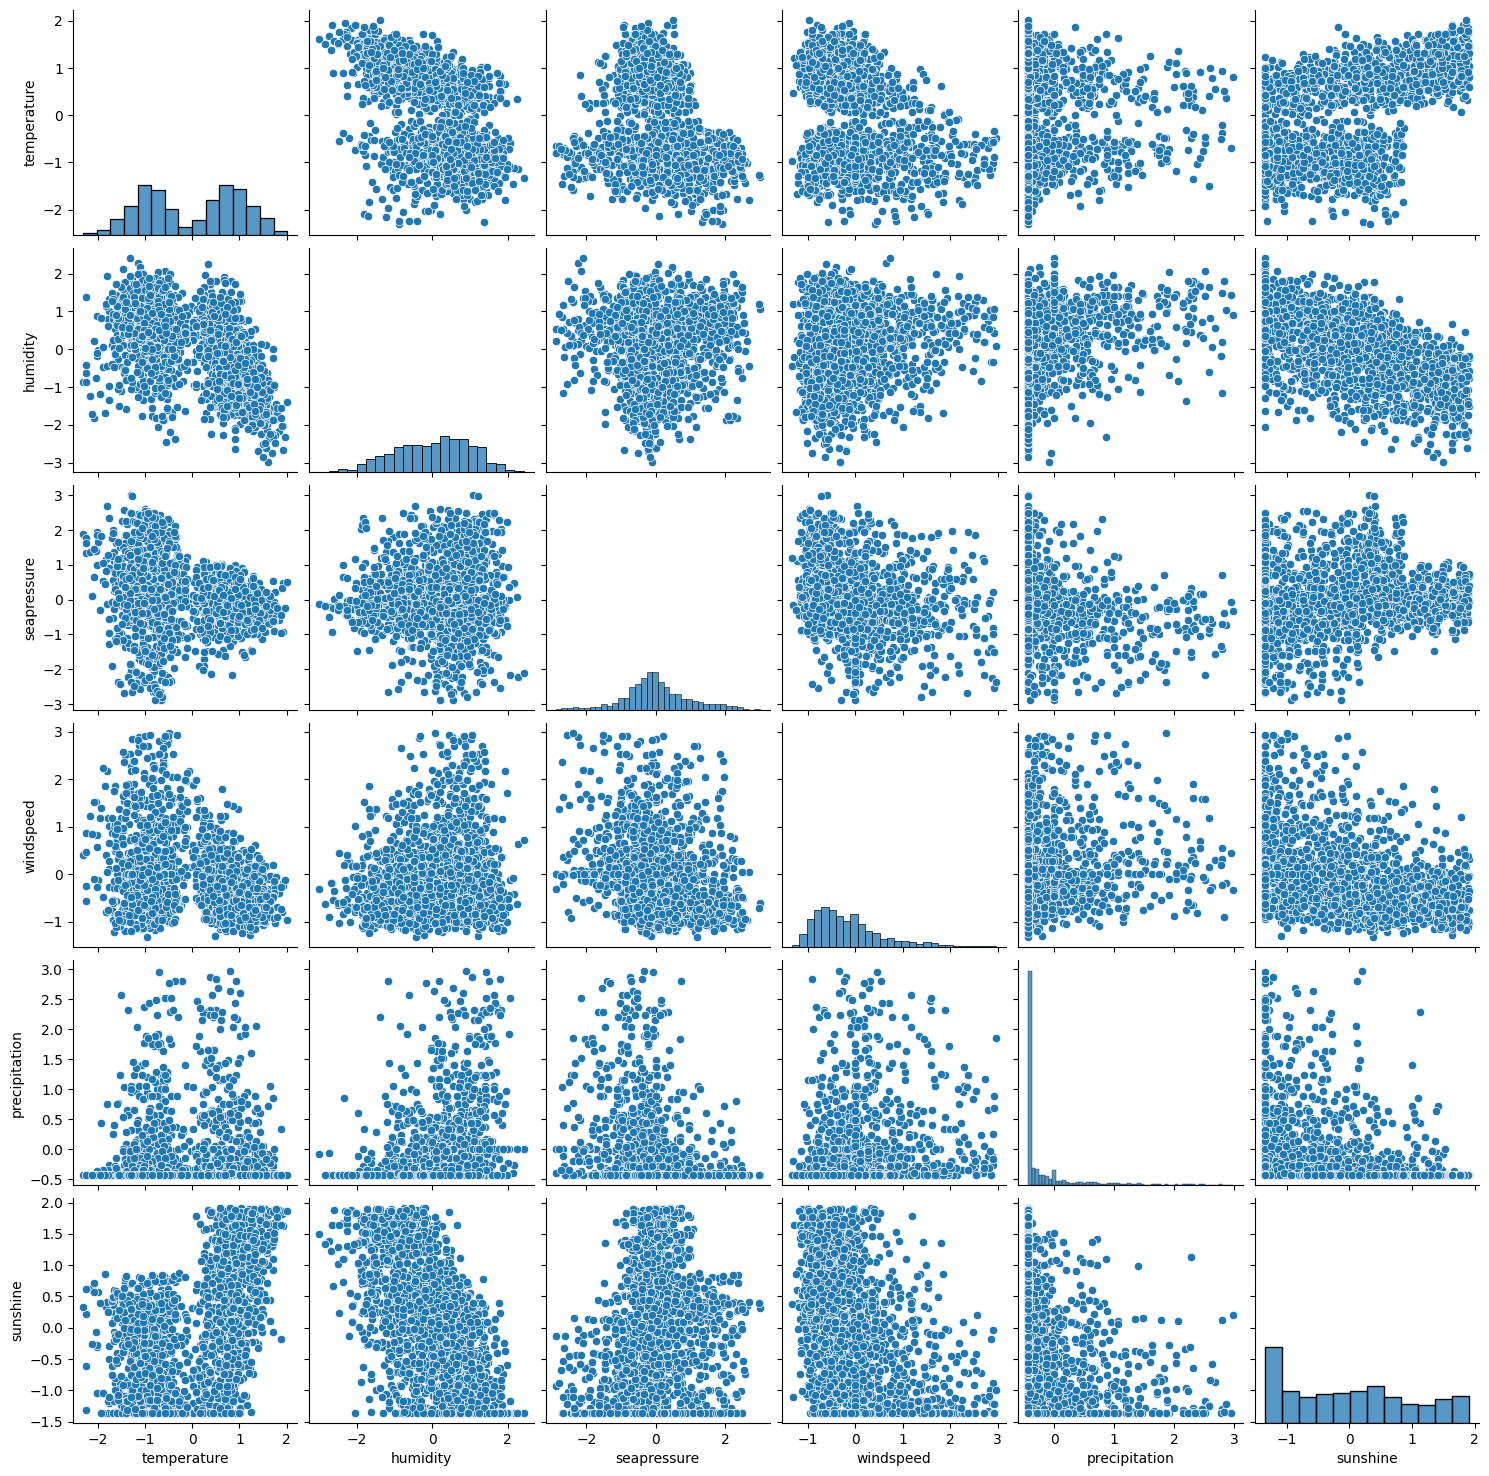

In [577]:
#### ------------ 3. Data Exploration (Pre-clustering) ----------------

### 3.1 Visualizing paired histograms and scatter
sns.pairplot(CD2_stand)
plt.savefig("sns_plot.png")

PCA Analysis Summary:
Explained Variance Ratio:
[0.53427986 0.17909263 0.11078668]

Cumulative Explained Variance:
[0.53427986 0.71337249 0.82415916]

Loading Table:
   temperature  humidity  seapressure  windspeed  precipitation  sunshine
0    -0.439219  0.359140    -0.030097   0.256270       0.202414 -0.755350
1     0.600513 -0.120369    -0.541240   0.167740       0.517704 -0.189209
2    -0.218559 -0.318979    -0.175776   0.855098      -0.201609  0.218515


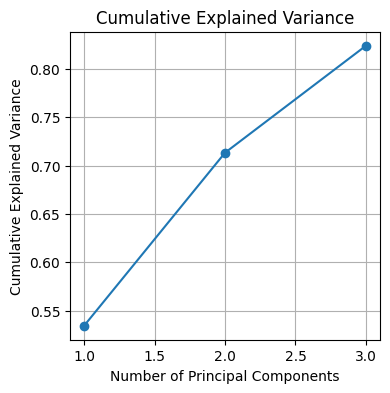

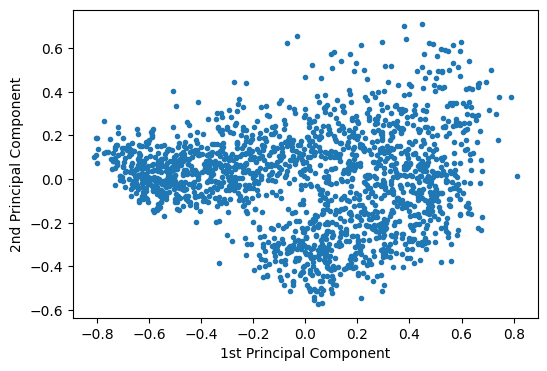

In [578]:
### 3.2 Visualizing cluster patterns through PCA 

# Normalization
def normalize(aa):
    aa2 = aa
    cols = aa.columns
    size = len(cols)
    mins = aa.min(axis=0)
    maxs = aa.max(axis=0)
    for c in range(0,len(cols)):
        aa2[cols[c]]= (aa[cols[c]]-mins[c])/(maxs[c]-mins[c])
    return aa2
        
norm_data = normalize(CD2_stand)

# Centralization
def centralize(aa):
    aa2 = aa
    cols = aa.columns
    means = aa.mean(axis=0)
    for c in range(0,len(cols)):
        aa2[cols[c]]= (aa[cols[c]]-means[c])
    return aa2

cent_data = centralize(norm_data)

# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3) 
pca_result = pca.fit(cent_data) 
Coeff = pca.components_
transformedData = pca.transform(cent_data)

loading_table = pd.DataFrame(pca.components_, columns=cent_data.columns)

# Summarize results
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Display the summary
print("PCA Analysis Summary:")
print("Explained Variance Ratio:")
print(explained_variance_ratio)
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)
print("\nLoading Table:")
print(loading_table)

# You can also plot the cumulative explained variance
plt.figure(figsize=(4, 4))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(transformedData[:,0],transformedData[:,1],".")
plt.xlabel("1st Principal Component") 
plt.ylabel("2nd Principal Component")
plt.show()

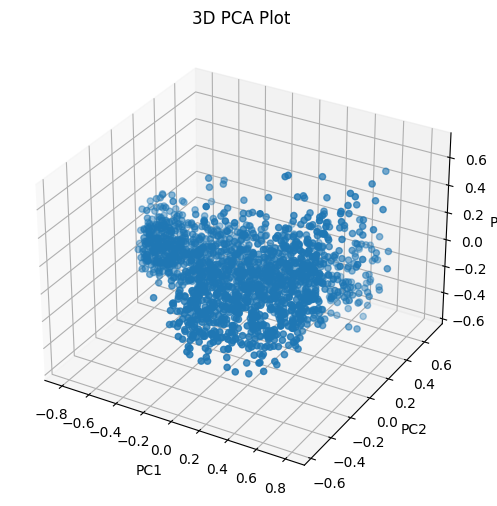

<Figure size 500x300 with 0 Axes>

In [579]:
# PCA in 3D plot to observe the three components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(cent_data)

# Create a 3D scatter plot with color-coded points based on PC1 values
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded points based on PC1 values
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2])

# Set axis labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Set plot title
plt.title('3D PCA Plot')
#plt.savefig('PCA 3D.png')
# Show the plot
plt.show()
plt.clf()

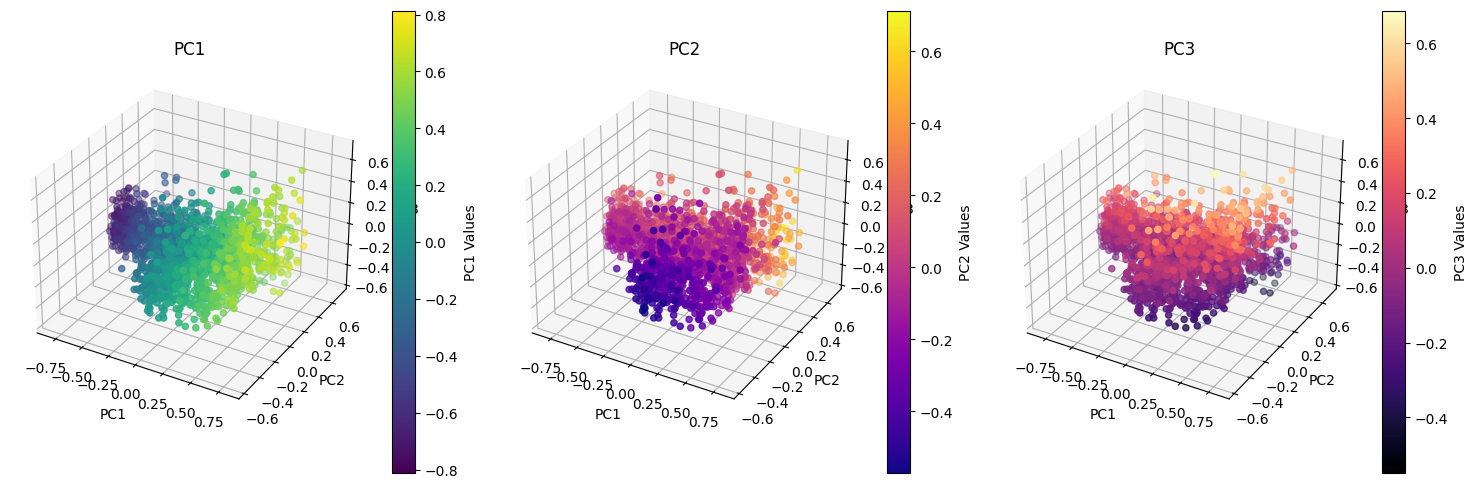

<Figure size 500x300 with 0 Axes>

In [580]:
# PCA visualizations of correlation of each variable with PC components, through gradient effect

pca = PCA(n_components=3)
pca_result = pca.fit_transform(cent_data)

# Create a 3D scatter plot with color-coded points for each principal component
fig = plt.figure(figsize=(15, 5))

# Plot for PC1
ax1 = fig.add_subplot(131, projection='3d')
scatter1 = ax1.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=pca_result[:, 0], cmap='viridis')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax1.set_title('PC1')

# Plot for PC2
ax2 = fig.add_subplot(132, projection='3d')
scatter2 = ax2.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=pca_result[:, 1], cmap='plasma')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
ax2.set_title('PC2')

# Plot for PC3
ax3 = fig.add_subplot(133, projection='3d')
scatter3 = ax3.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=pca_result[:, 2], cmap='magma')
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.set_zlabel('PC3')
ax3.set_title('PC3')

# Adding colorbars
cbar1 = plt.colorbar(scatter1, ax=ax1, label='PC1 Values')
cbar2 = plt.colorbar(scatter2, ax=ax2, label='PC2 Values')
cbar3 = plt.colorbar(scatter3, ax=ax3, label='PC3 Values')

# Adjust layout
plt.tight_layout()

#plt.savefig('PCA 3D colored.png')
# Show the plot
plt.show()
plt.clf()

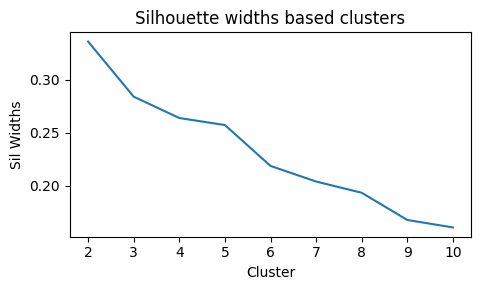

In [581]:
# ------------ 4.A.A Clustering (Pathway 1) ----------------
### --- Silhouette widths method for K Medoids CLustering ---
#import kmedoids

from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples, silhouette_score

sw = []
elbow_med = []
for i in range(2,11):
    kMedoids = KMedoids(n_clusters = i, random_state = 0,method = 'pam',metric = 'manhattan').fit(CD2_stand) 
    
    y_kmed = kMedoids.fit_predict(CD2_stand)
    silhouette_avg = silhouette_score(CD2_stand,y_kmed)
    sw.append(silhouette_avg)
    elbow_med.append(kMedoids.inertia_)

plt.plot(range(2,11),sw)
plt.title('Silhouette widths based clusters')
plt.xticks(range(2, 11))
plt.xlabel('Cluster')
plt.ylabel('Sil Widths')
plt.tight_layout()
#plt.savefig('Silhouette Kmedoids')
plt.show()
plt.close()
#  lower SW elbow will not be a good cluster

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(


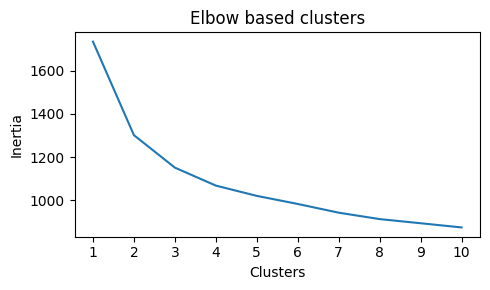

In [582]:
# ------------ 4.A.A Clustering (Pathway 1) ----------------
### --- Elbow method for K Medoids CLustering ---
#sw = []
elbow_med = []
for i in range(1,11):
    kMedoids = KMedoids(n_clusters = i, random_state = 0,method = 'pam',metric = 'manhattan').fit(CD2_stand)
    y_kmed = kMedoids.fit_predict(CD2_stand)
    #silhouette_avg = silhouette_score(CD2_stand,y_kmed)
    #sw.append(silhouette_avg)
    elbow_med.append(kMedoids.inertia_)

plt.plot(range(1,11),elbow_med)
plt.title('Elbow based clusters')
plt.xticks(range(1, 11))
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.tight_layout()
#plt.savefig('KMedoid_Elbowplot.png')
plt.show()
plt.close()
#  lower SW elbow will not be a good cluster

In [616]:
# ------------ 4.A.A Clustering (Pathway 1) ----------------
### --- K Medoids CLustering ---
# focuses on reducing the dissimilarities between clusters of data from the dataset
# uses Manhattan Distance
# suitable for smaller data sets as compared to K mean
# + less sensitive to outliers since outliers havent been removed in this pathway
# + more robust to noise than K means (we haven't done noise removal)
# - works for spherical clusters only, not for other shapes

#import kmedoids
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples, silhouette_score
import time

# get the start time
st = time.time()

kMedoids = KMedoids(n_clusters = 3, random_state = 0, method = 'pam',metric = 'manhattan').fit(CD2_stand)
y_kmed = kMedoids.fit_predict(CD2_stand)

# Time taken
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

silhouette_avg = silhouette_score(CD2_stand,y_kmed)
print("KMedoids Silhouette Score(k=3): ",silhouette_avg)
print("KMedoids Inertia (k=3): ",kMedoids.inertia_)
print(kMedoids.cluster_centers_)


#---------
kMedoids2 = KMedoids(n_clusters = 4, random_state = 0, method = 'pam',metric = 'manhattan').fit(CD2_stand)
y_kmed2 = kMedoids2.fit_predict(CD2_stand)
silhouette_avg = silhouette_score(CD2_stand,y_kmed2)
print("KMedoids -2 Silhouette Score(k=4): ",silhouette_avg)
print("KMedoids -2 Inertia (k=4): ",kMedoids2.inertia_)
#y_kmed
#kMedoids.inertia_

Execution time: 0.5063290596008301 seconds
KMedoids Silhouette Score(k=3):  0.2837865120059558
KMedoids Inertia (k=3):  1151.842776666562
[[-0.12385443  0.1718598  -0.10304014  0.0432082   0.03372505 -0.41484231]
 [ 0.24018509 -0.12298244 -0.01852258 -0.11373318 -0.09263059  0.31463809]
 [-0.22914528  0.08486976  0.11241232 -0.10409799 -0.09263059  0.03080668]]
KMedoids -2 Silhouette Score(k=4):  0.26369560168454514
KMedoids -2 Inertia (k=4):  1068.728172394295


   temperature  humidity  seapressure  windspeed  precipitation  sunshine  \
0    -0.123854  0.171860    -0.103040   0.043208       0.033725 -0.414842   
1     0.240185 -0.122982    -0.018523  -0.113733      -0.092631  0.314638   
2    -0.229145  0.084870     0.112412  -0.104098      -0.092631  0.030807   

   medoids  
0        0  
1        1  
2        2  


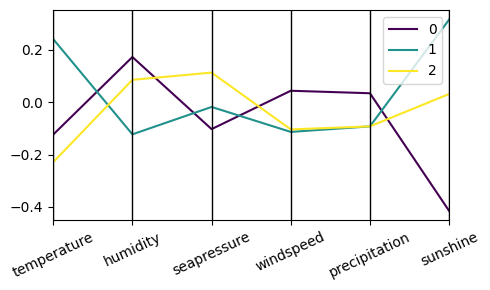

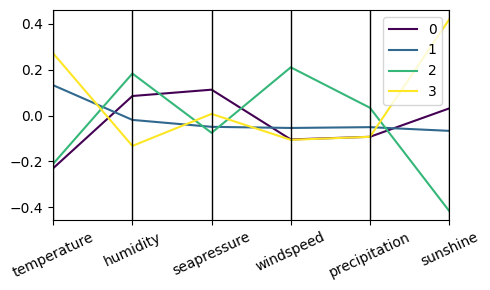

In [584]:
# ------------ 4.A.B Clustering (Pathway 1) ----------------
### --- Parallel plot for K Medoids CLustering ---
medoids1A = pd.DataFrame(kMedoids.cluster_centers_, columns=CD2_stand.columns)
medoids1A['medoids'] = medoids1A.index
print(medoids1A)

plt.figure() 
cc = pd.plotting.parallel_coordinates(medoids1A,'medoids',colormap = 'viridis')
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
cc.grid()
plt.xticks(rotation = 25)
plt.tight_layout()
plt.savefig("medoids_k3.png")
plt.show()
plt.close()

# -------- Parallel plot 2 ---
medoids2 = pd.DataFrame(kMedoids2.cluster_centers_, columns=CD2_stand.columns)
medoids2['medoids'] = medoids2.index
plt.figure()
az = pd.plotting.parallel_coordinates(medoids2,'medoids',colormap = 'viridis')
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
az.grid()
plt.xticks(rotation = 25)
plt.tight_layout()
plt.savefig("medoids_k4.png")
plt.show()
plt.close()
#plt.savefig("/Users/risham/Downloads/SCC 403 Data Mining/Course work due 15 Dec/medoids_plot.png")

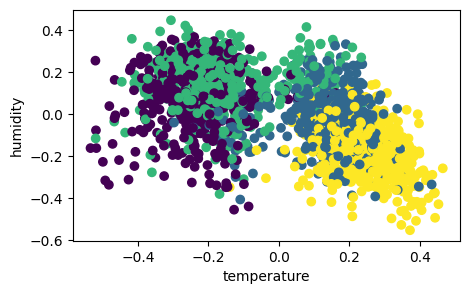

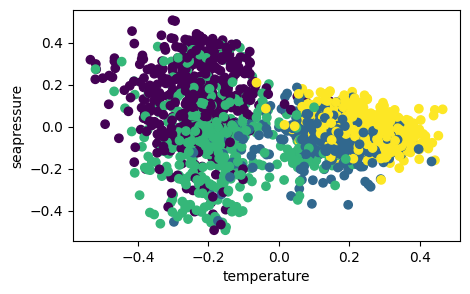

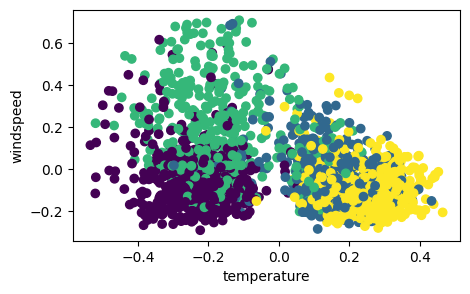

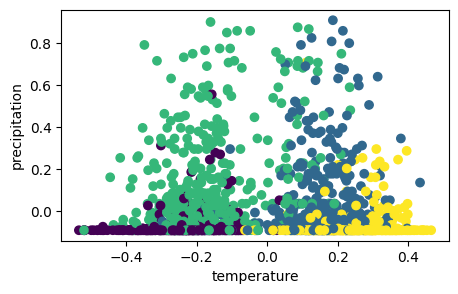

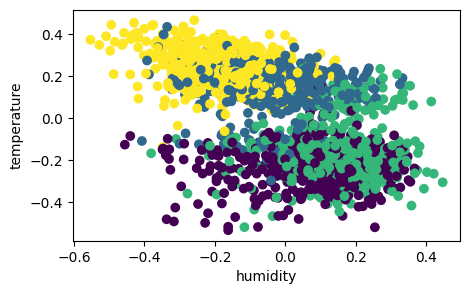

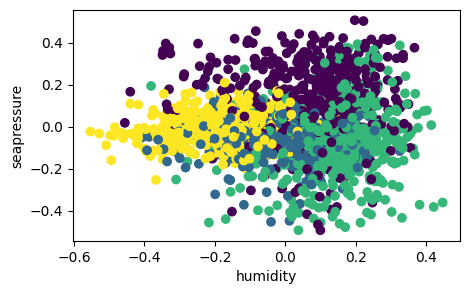

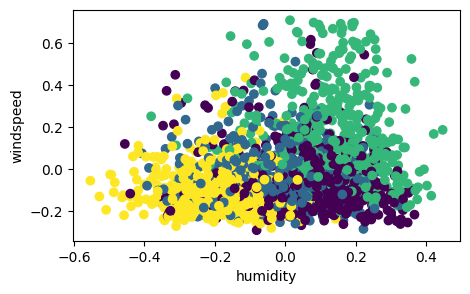

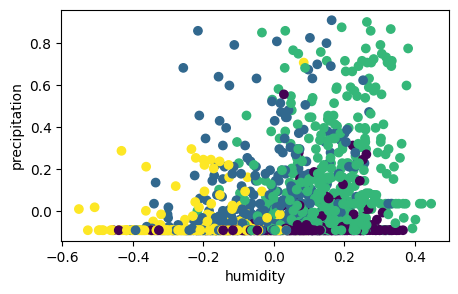

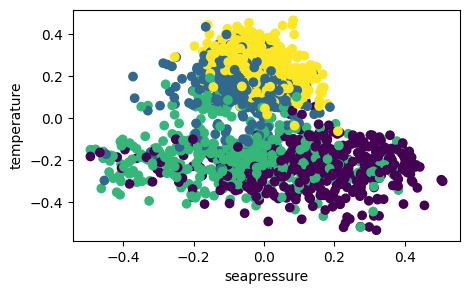

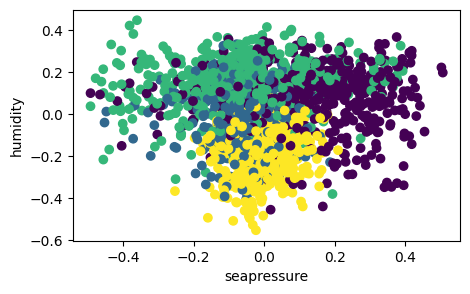

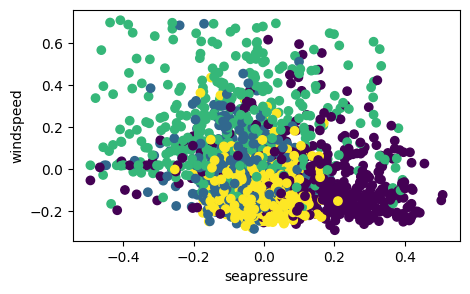

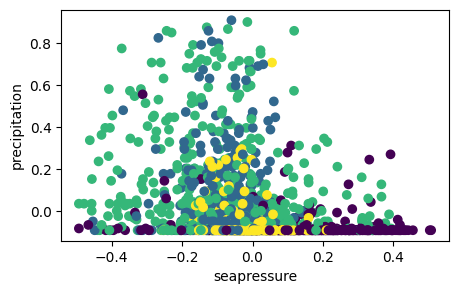

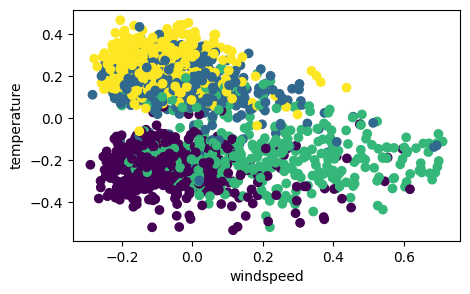

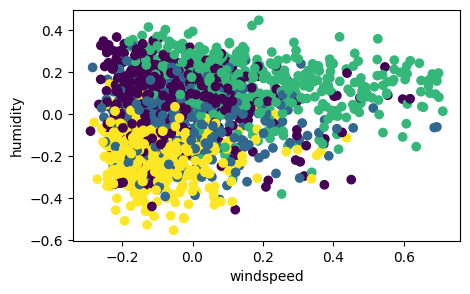

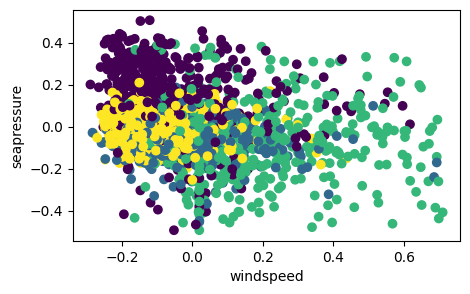

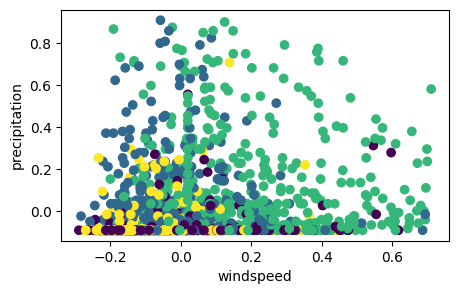

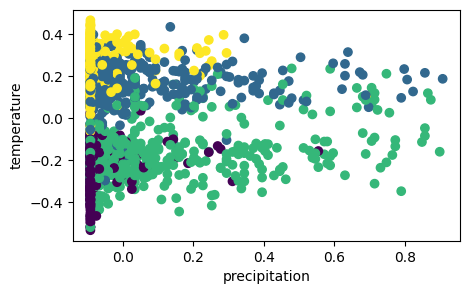

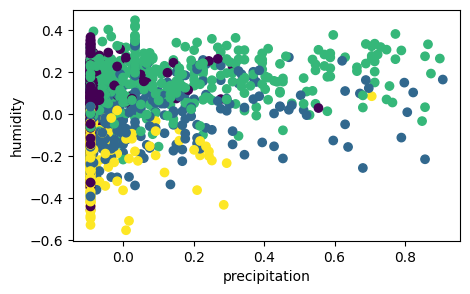

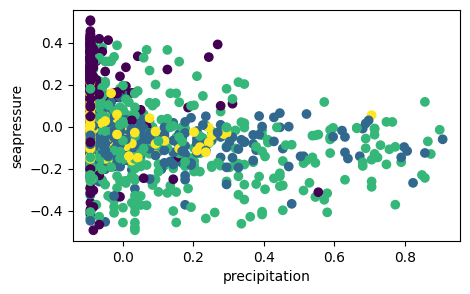

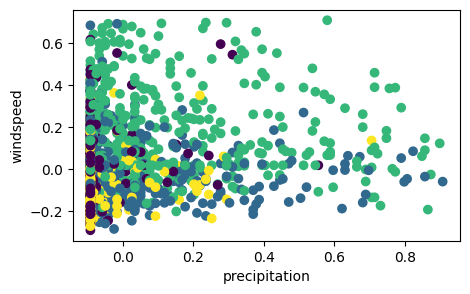

In [610]:
# ------------ 4.A.B Clustering (Pathway 1) ----------------
### --- Seperate plots for K Medoids CLustering ---
for i in range(0,5):
    for j in range(0,5):
        if i == j:
            continue
        cols = CD2_stand.columns
        plt.scatter(CD2_stand[cols[i]], CD2_stand[cols[j]], c = kMedoids2.labels_, cmap= "viridis") # plotting the clusters
        plt.xlabel(cols[i]) # X-axis label
        plt.ylabel(cols[j]) # Y-axis label
        plt.show()

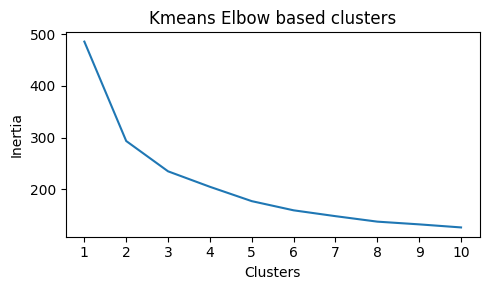

In [586]:
# ------------ 4.A.B Clustering (Pathway 1) ----------------
### --- Elbow method for K Means CLustering ---
elbow = []
for i in range(1,11):
    KMean= KMeans(n_clusters=i,init= 'k-means++',n_init = 1,random_state= 1)
    KMean.fit(CD2_stand)
    x = KMean.inertia_
    elbow.append(x)

plt.plot(range(1,11),elbow)
plt.title('Kmeans Elbow based clusters')
plt.xticks(range(1, 11))
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.savefig("kmeans_elbow.png")
plt.show()
plt.close()


In [615]:
# ------------ 4.A.B Clustering (Pathway 1) ----------------
### --- K Means CLustering ---
from sklearn.cluster import KMeans

st = time.time()

KMean= KMeans(n_clusters= 3,init = 'k-means++',random_state=1,n_init='auto')
KMean.fit(CD2_stand)
kmeans= KMean.fit_predict(CD2_stand)

# Time taken
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


silhouette_avg = silhouette_score(CD2_stand,kmeans)
print("Kmeans Silhouette Score(k=3): ",silhouette_avg)
print("Kmeans Inertia (k=3): ",KMean.inertia_)


#print(f'Kmeans Silhouette Score(n=4): {silhouette_score(CD2_stand, kmeans)}')


Execution time: 0.15242385864257812 seconds
Kmeans Silhouette Score(k=3):  0.303240509681863
Kmeans Inertia (k=3):  234.65526397673335


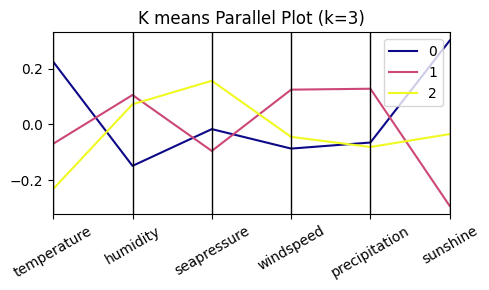

<function matplotlib.pyplot.close(fig=None)>

In [599]:
# ------------ 4.A.B Clustering (Pathway 1) ----------------
### --- Parallel plot for K Means CLustering ---from sklearn.decomposition import PCA
centres2 = pd.DataFrame(KMean.cluster_centers_, columns=CD2_stand.columns)

centres2['centres'] = centres2.index

bb = pd.plotting.parallel_coordinates(centres2,'centres',colormap = 'plasma')
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
bb.grid()
plt.title("K means Parallel Plot (k=3)")
plt.xticks(rotation = 30)
plt.tight_layout()
plt.savefig("/Users/risham/Downloads/SCC 403 Data Mining/Course work due 15 Dec/Kmeans_k3.png")
plt.show()
plt.close


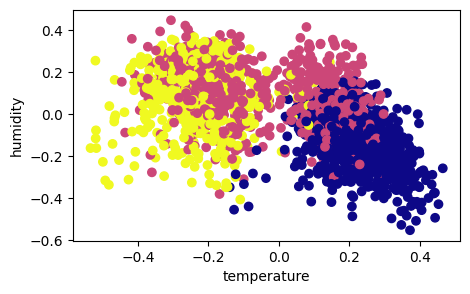

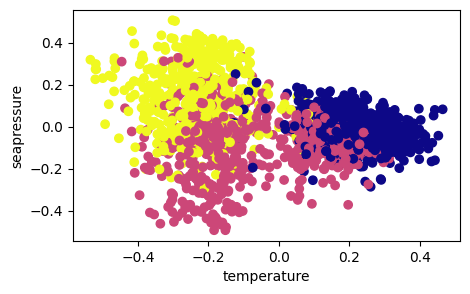

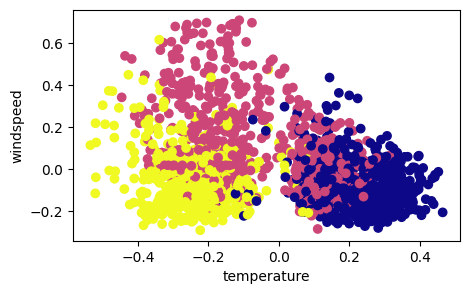

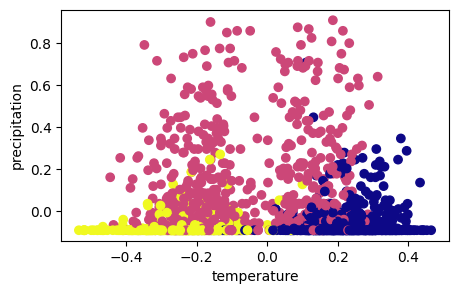

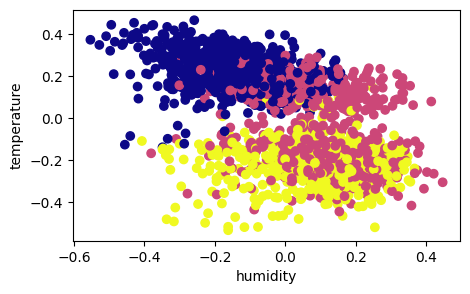

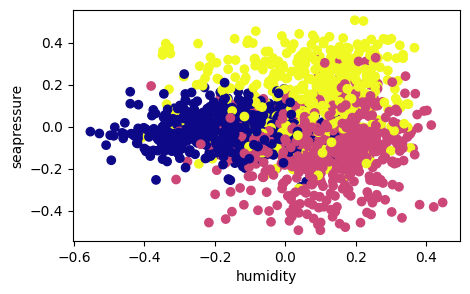

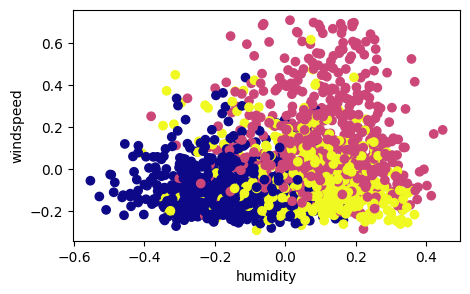

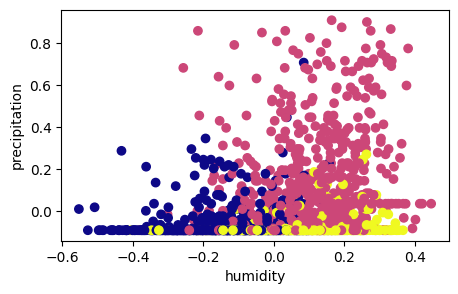

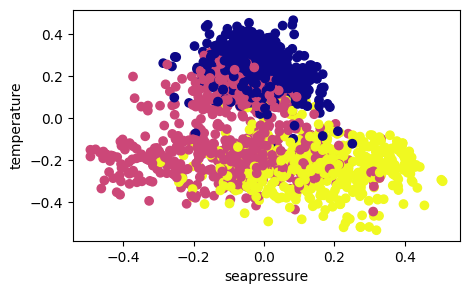

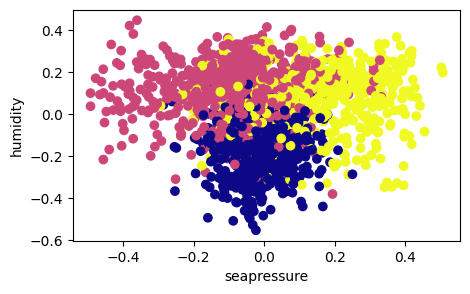

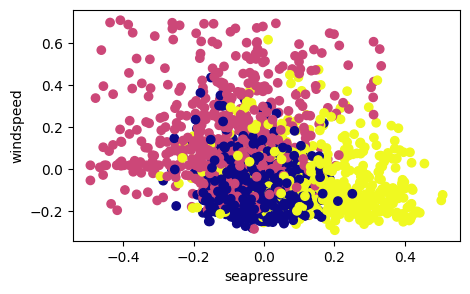

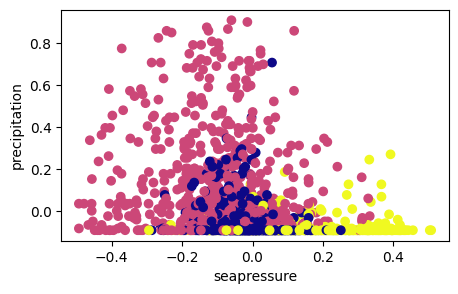

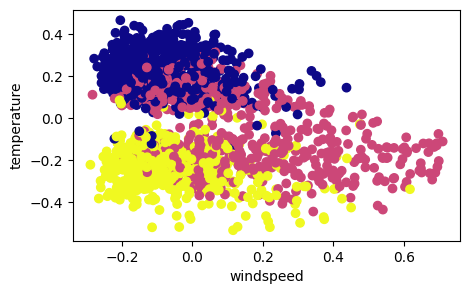

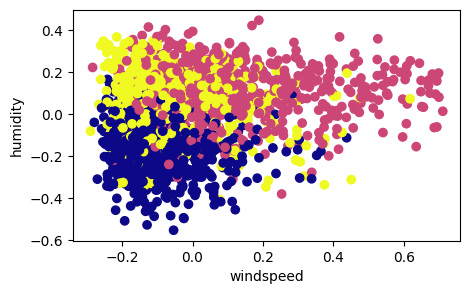

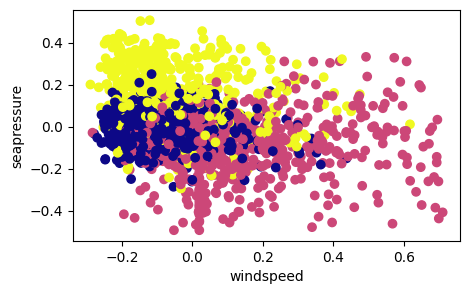

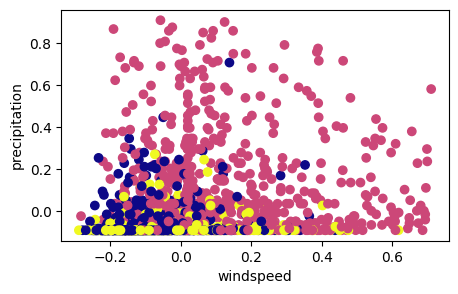

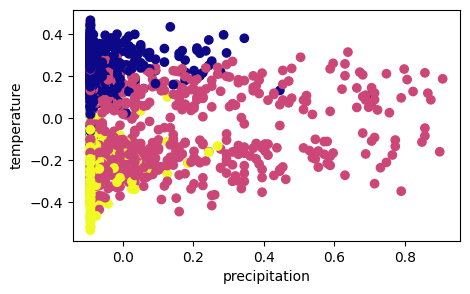

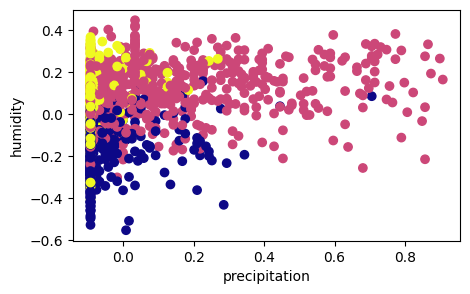

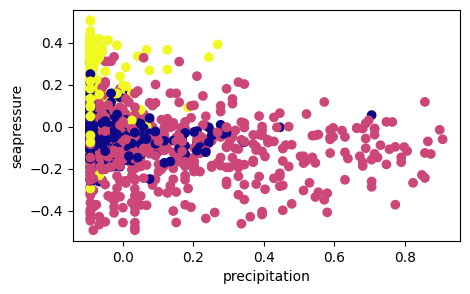

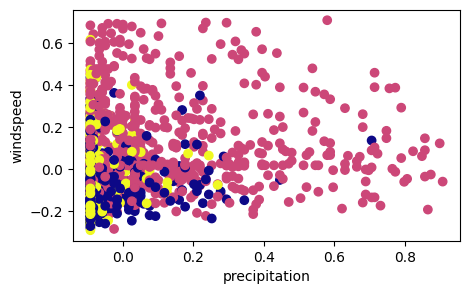

In [589]:
# ------------ 4.A.B Clustering (Pathway 1) ----------------
### --- Seperate plots for K Means CLustering ---

for i in range(0,5):
    for j in range(0,5):
        if i == j:
            continue
        cols = CD2_stand.columns
        plt.scatter(CD2_stand[cols[i]], CD2_stand[cols[j]], c = KMean.labels_, cmap= "plasma") # plotting the clusters
        plt.xlabel(cols[i]) # X-axis label
        plt.ylabel(cols[j]) # Y-axis label
        plt.show()

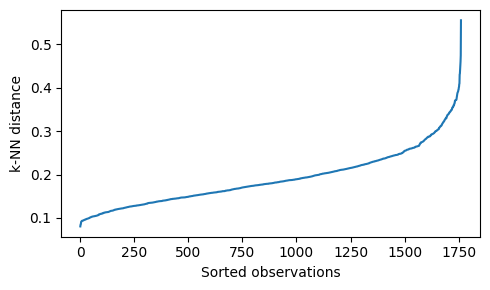

In [590]:
# ------------ 4.A.B Clustering (Pathway 3) ----------------
### --- DBSCAN clustering - Epsilon value plot KNN -----

CD2_stand.isnull().any().any()

from sklearn.neighbors import NearestNeighbors # importing the library

neighb = NearestNeighbors(n_neighbors=12) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(CD2_stand) # fitting the data to the object
distances,indices=nbrs.kneighbors(CD2_stand)

# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 11] # taking the second last column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations")
plt.tight_layout()
plt.savefig("knn_elbow_dbscan.png")
plt.show()
plt.close()


In [591]:
# ------------ 4.A.B Clustering (Pathway 3) ----------------
### --- DBSCAN clustering  finding optimum parameters -----

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

from sklearn import metrics

epsilon = np.arange(0.10,0.375,0.025)
#min_samples = np.arange(2,12,1)
min_samples = np.arange(9,13,1)


sil_avg = []
max_value = [0,0,0,0]

labels_count=[]
min_samples_list=[]
silscores=[]
eps=[]
count = 0

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        #print("minsamples",min_samples[j],"epsilon",epsilon[i])
        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(CD2_stand)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        #print("clusters ",n_clusters_)
        #print("labels ",len(labels))
        n_noise_ = list(labels).count(-1)
        #print("noise ",n_noise_)
        #print(metrics.silhouette_score(CD2_stand, labels))
        silhouette_avg = metrics.silhouette_score(CD2_stand, labels)
        
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

        if (n_clusters_ != 1 and silhouette_avg > 0):
            silscores.append(silhouette_avg)
            labels_count.append(n_clusters_)
            min_samples_list.append(min_samples[j])
            eps.append(epsilon[i])
        count += 1
        
#results = pd.DataFrame(labels_count,silscores,min_samples_list,eps)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

#Advantages
#The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering.
#Zero is the lowest possible score. Values closer to zero indicate a better partition.
#Scores around zero indicate overlapping clusters.
#The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
#Drawbacks
#The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, 
#such as density based clusters like those obtained through DBSCAN.

results = {'clusters':labels_count,'silscores':silscores,'minsamples':min_samples_list,'epsilons':eps}
results = pd.DataFrame(results)
results.sort_values(by=['silscores'],ascending=True)
results.iloc[:,:]

epsilon= 0.32499999999999996 
min_sample= 9 
number of clusters= 1 
average silhouette score= 0.3336


clusters  silscores  minsamples  epsilons
0         2   0.184199           9     0.150
1         2   0.173386          10     0.150
2         2   0.165294          11     0.150
3         2   0.158849          12     0.150
4         3   0.123434           9     0.200
5         2   0.198744           9     0.225
6         2   0.197144          10     0.225

Execution time: 0.039376020431518555 seconds
davies_bouldin_score =  1.9412034442657073


/var/folders/nt/z2lxlccd40v51ny_1byyphwm0000gn/T/ipykernel_15156/433711763.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_core['Cluster'] = labels[core_points_mask]


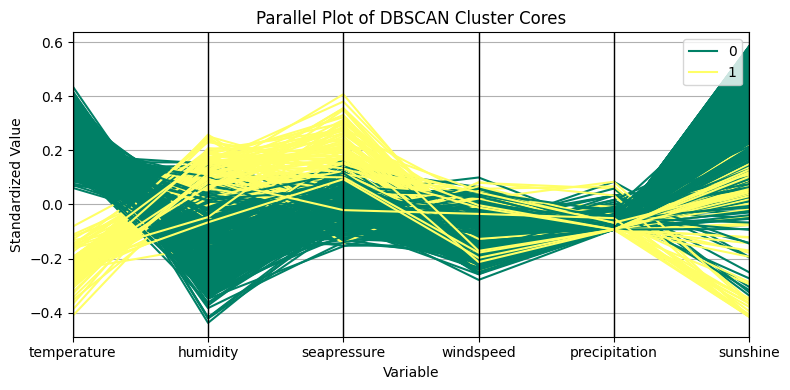

In [614]:
###### ----------- DBSCAN -----------------
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D visualization
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates

# Assuming you have a DataFrame named 'df' with 6 standardized columns
# Replace 'df' and column names with your actual DataFrame and column names

# Standardize the data (if not already standardized)
# scaler = StandardScaler()
# df_std = scaler.fit_transform(df)

st = time.time()
# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.15, min_samples=12)
labels = dbscan.fit_predict(CD2_stand)

# Time taken
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

# Extract core points
core_points_mask = dbscan.core_sample_indices_
df_core = CD2_stand.iloc[core_points_mask, :]

# Add cluster labels to the core DataFrame
df_core['Cluster'] = labels[core_points_mask]

print('davies_bouldin_score = ',metrics.davies_bouldin_score(CD2_stand, dbscan.labels_))

# Visualize core points using a parallel plot
plt.figure(figsize=(8, 4))
parallel_coordinates(df_core, 'Cluster', colormap='summer')
plt.title('Parallel Plot of DBSCAN Cluster Cores')
plt.xlabel('Variable')
plt.ylabel('Standardized Value')
plt.tight_layout()
plt.savefig("dbscan_parallelcore.png")
plt.show()
plt.close()


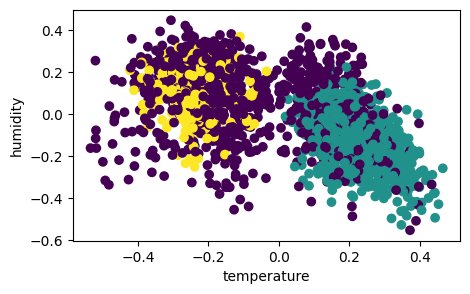

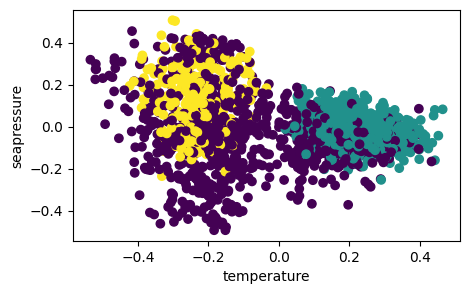

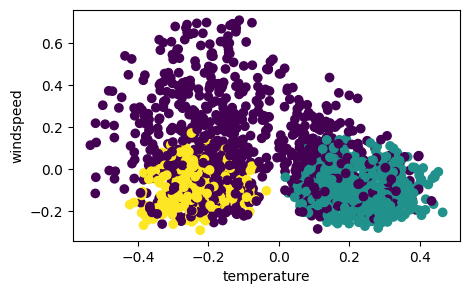

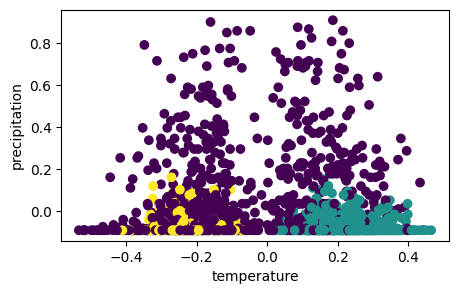

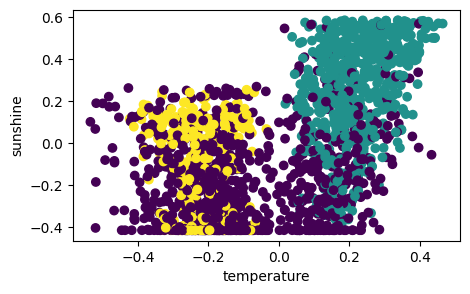

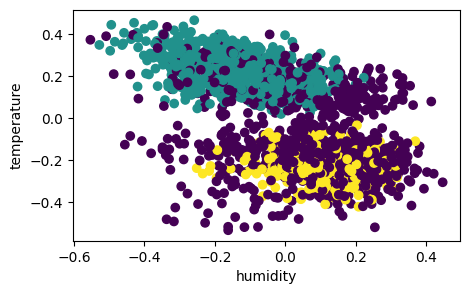

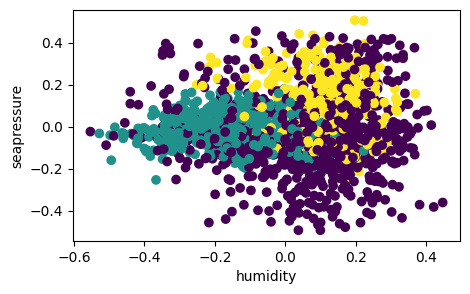

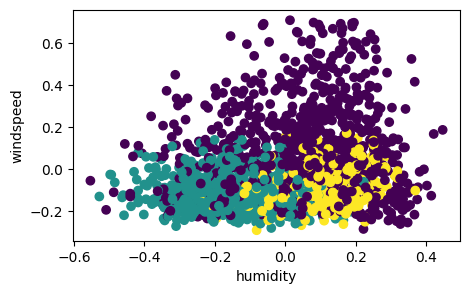

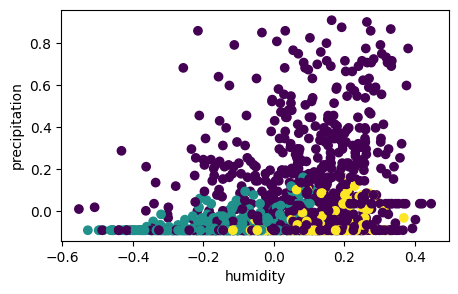

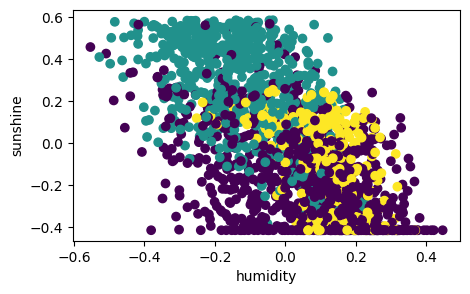

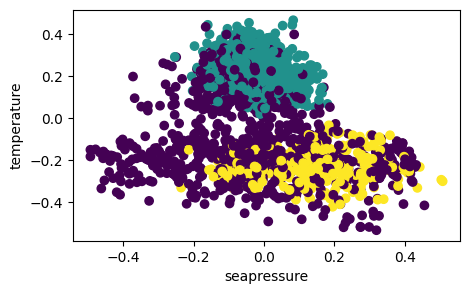

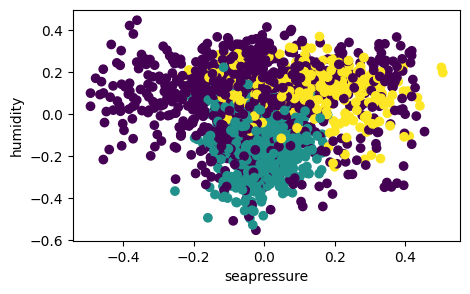

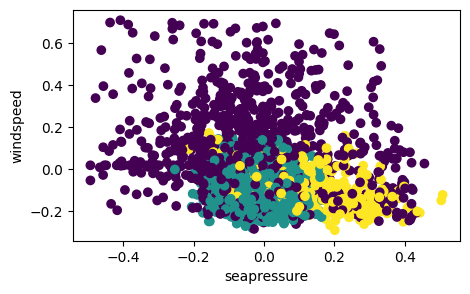

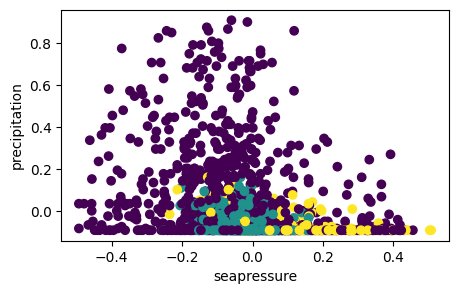

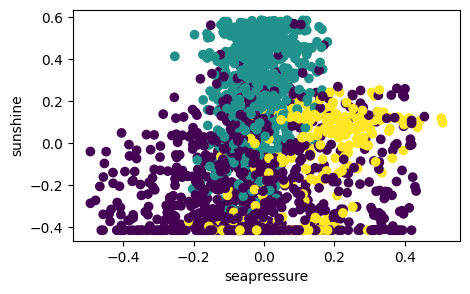

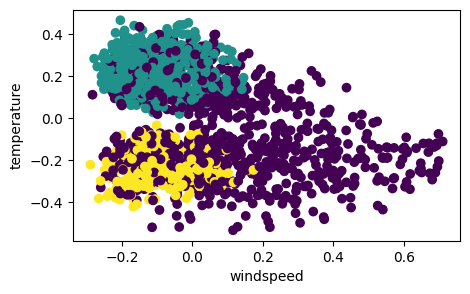

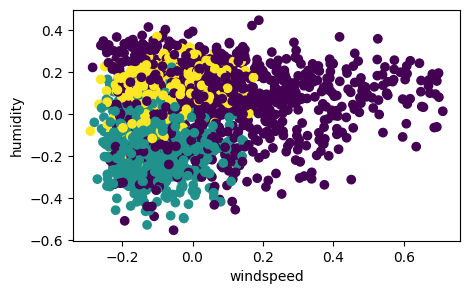

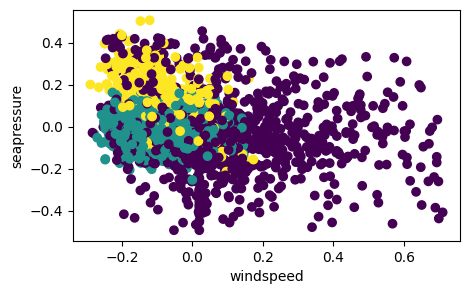

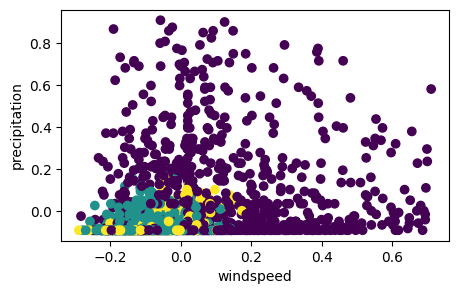

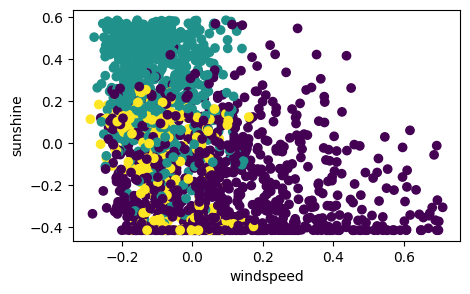

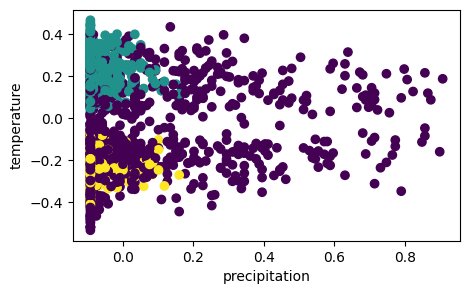

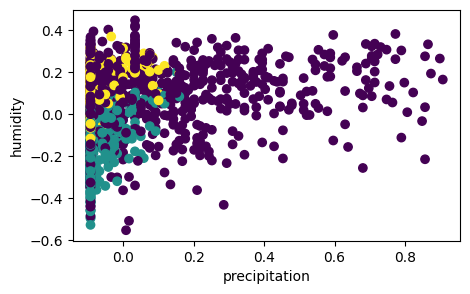

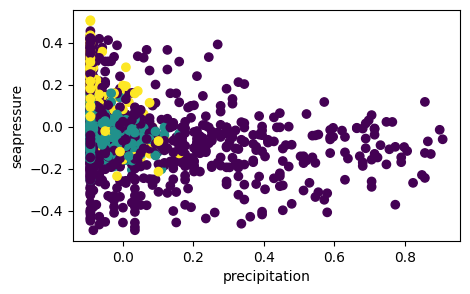

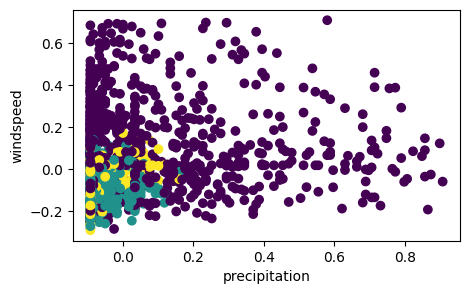

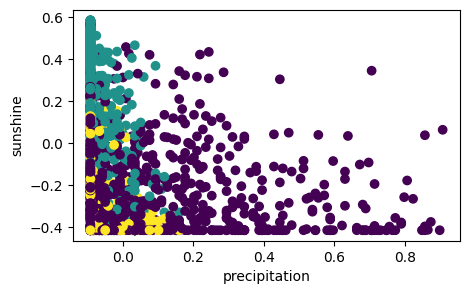

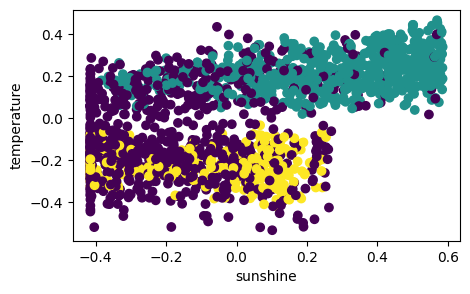

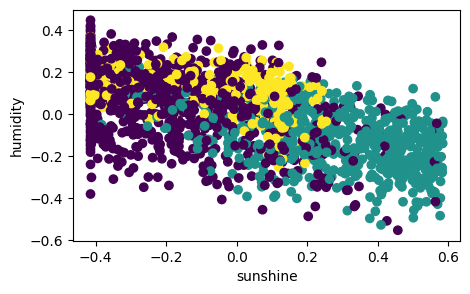

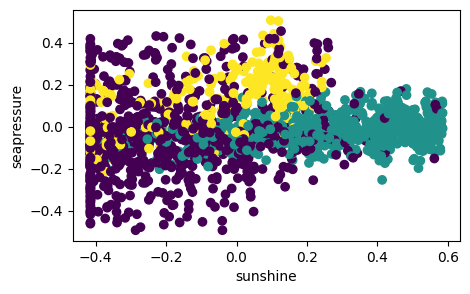

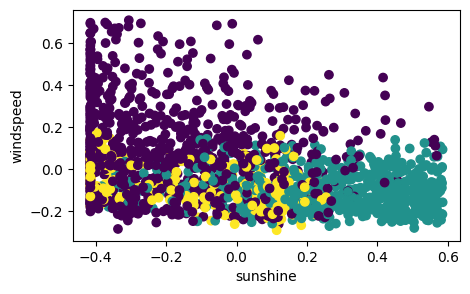

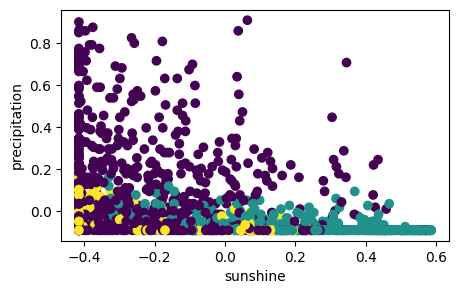

In [602]:
# ------------ 4.A.B Clustering (Pathway 3) ----------------
### --- Seperate plots for DBSCAN clustering -----

for i in range(0,6):
    for j in range(0,6):
        if i == j:
            continue
        cols = CD2_stand.columns
        plt.scatter(CD2_stand[cols[i]], CD2_stand[cols[j]], c = labels, cmap= "viridis") # plotting the clusters
        plt.xlabel(cols[i]) # X-axis label
        plt.ylabel(cols[j]) # Y-axis label
        plt.show()

